In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import models.elec_motor_model as elecmotmod
import utils as u
from steps import preprocess
from visualization import papermode

papermode(plt, size=18)


In [2]:
# Parameters
abbr = "H03"

In [3]:
# Parameters
abbr = "Y20"


In [4]:
preprocess(abbr, verbose=False)
emm_df = elecmotmod.emm_main(abbr)

Y20 : Exported ELECMOTMOD CSV in data/runs/Y20/models/Y20_2023_06_13-14_51_51-YY-HuskyNoLoad110_elecmotmod.csv


In [5]:
print(emm_df.columns.values)

['time' 'time_rel' 'vx' 'vy' 'vz' 'px' 'py' 'pz' 'psi' 'theta' 'phi' 'wz'
 'ax' 'ay' 'az' 'qw' 'qx' 'qy' 'qz' 'cmd_v' 'cmd_w' 'wL' 'wR' 'voltage'
 'V_L' 'V_R' 'current_cpu' 'I_L' 'I_R' 'ax_corr' 'ay_corr' 'az_corr' 'v'
 'a' 'vL' 'vR' 'PE_L' 'PE_R' 'Tmot_L' 'Tmot_R' 'TL' 'TR' 'PM_L' 'PM_R'
 'P_logical' 'P_motion' 'PE_motion' 'P_total' 'P_mot' 'P_log' 'Ploss_L'
 'Rloss_L' 'Ploss_R' 'Rloss_R' 'eta_L' 'eta_R' 'dI_L' 'dI_R' 'dt' 'dILdt'
 'dIRdt']


In [6]:
model_name = elecmotmod.__MODEL_NAME__.lower()
basename = u.get_basename(u.get_filename(abbr))
figdir = u.get_figdir(basename, subdir=model_name)
model_name = elecmotmod.__MODEL_NAME__.title()
cmap = plt.get_cmap("turbo")

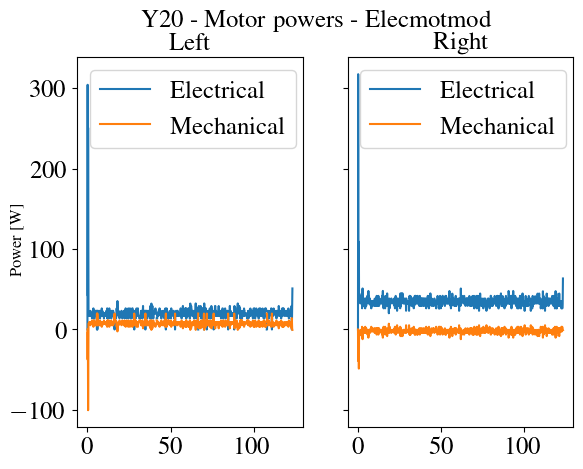

In [7]:
fig, [ax1,ax2] = plt.subplots(ncols=2, sharey=True)
ax1.plot(emm_df.time_rel, emm_df.PE_L, label="Electrical")
ax1.plot(emm_df.time_rel, emm_df.PM_L, label="Mechanical")
ax2.plot(emm_df.time_rel, emm_df.PE_R, label="Electrical")
ax2.plot(emm_df.time_rel, emm_df.PM_R, label="Mechanical")
ax1.legend()
ax2.legend()
ax1.set_title("Left")
ax2.set_title("Right")
fig.suptitle(f"{abbr} - Motor powers - {model_name}")
fig.supylabel("Power [W]")
fig.savefig(figdir / f"{abbr}_motor-powers.jpg", bbox_inches="tight")

In [8]:
emm_df["Ploss_L"] = emm_df.PE_L - emm_df.PM_L
emm_df["Rloss_L"] = emm_df.Ploss_L / (emm_df.I_L)**2
emm_df["Ploss_R"] = emm_df.PE_R - emm_df.PM_R
emm_df["Rloss_R"] = emm_df.Ploss_R / (emm_df.I_R)**2

emm_df["eta_L"] = emm_df.PM_L / emm_df.PE_L
emm_df["eta_R"] = emm_df.PM_R / emm_df.PE_R

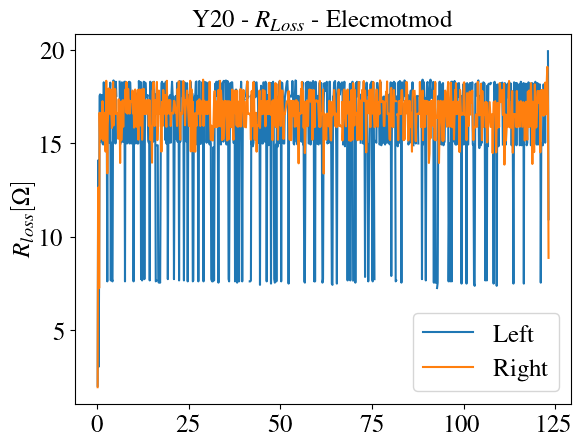

In [9]:
fig, ax = plt.subplots()
ax.plot(emm_df.time_rel, emm_df.Rloss_L, label="Left")
ax.plot(emm_df.time_rel, emm_df.Rloss_R, label="Right")
ax.set_ylabel("$R_{loss} [\Omega]$")
ax.legend()
ax.set_title(f"{abbr} - $R_{{Loss}}$ - {model_name}")
fig.savefig(figdir / f"{abbr}_Rlosses.jpg", bbox_inches="tight")

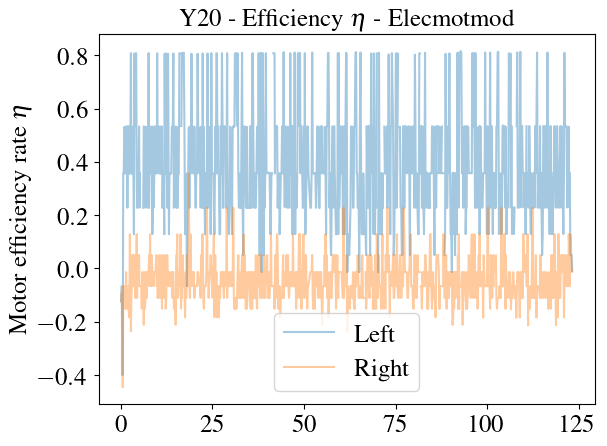

In [10]:
fig, ax = plt.subplots()
ax.plot(emm_df.time_rel, emm_df.eta_L, label="Left", alpha=0.4)
ax.plot(emm_df.time_rel, emm_df.eta_R, label="Right", alpha=0.4)
ax.legend()
ax.set_ylabel("Motor efficiency rate $\eta$")
ax.set_title(f"{abbr} - Efficiency $\eta$ - {model_name}")
# ax.set_ylim((0,1))
fig.savefig(figdir / f"{abbr}_efficiency.jpg", bbox_inches="tight")

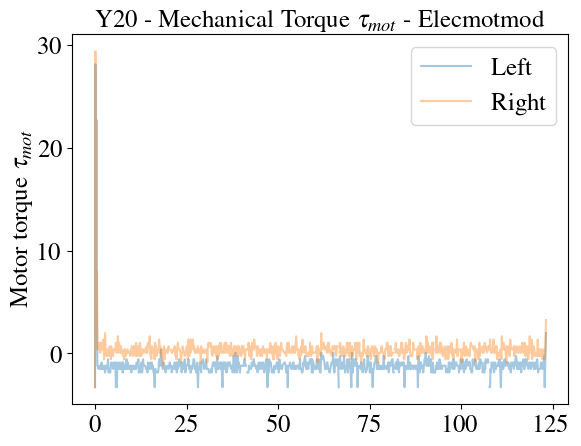

In [11]:
fig, ax = plt.subplots()
ax.plot(emm_df.time_rel, emm_df.TL, label="Left", alpha=0.4)
ax.plot(emm_df.time_rel, emm_df.TR, label="Right", alpha=0.4)
ax.legend()
ax.set_ylabel("Motor torque $\\tau_{{mot}}$")
ax.set_title(f"{abbr} - Mechanical Torque $\\tau_{{mot}}$ - {model_name}")
# ax.set_ylim((0,1))
fig.savefig(figdir / f"{abbr}_torque.jpg", bbox_inches="tight")